In [2]:
__author__ = "Kübra Yıkılmaz"
__license__ = "GPL"
__version__ = "1.0.1"
__email__ = "kubra.yikilmaz@turkcell.com.tr"
__status__ = "Production"
#pip install Faker
#pip install xlrd
#pip install networkx
#pip install scipy
from faker import Faker
fake = Faker()
import random
from random import randrange
import datetime 
from dateutil.relativedelta import *
import networkx as nx
import matplotlib.pyplot as plt
import xlrd

In [2]:
CustomerNumber=100
OperatorNumber = 3
max_call_number = 2

In [3]:
class Operator:
    def __init__(self,name,marketshare):
        self.name = name
        self.marketshare = marketshare
        self.customers = []
        
    def info(self):
        print(self.name)

In [4]:
def CreateOperator(OperatorNumber = OperatorNumber):
    operators = []
    last_marketshare = 0
    
    for i in range(OperatorNumber):
        if i==0:
            ms = random.randint(0,100)
            last_marketshare += ms
            o = Operator(fake.company(),(ms/100))
            operators.append(o)
        elif i==OperatorNumber-1:
            o = Operator(fake.company(),((100-last_marketshare)/100))
            operators.append(o)    
        
        else:
            ms = random.randint(0,(100-last_marketshare))
            o = Operator(fake.company(),(ms/100))
            operators.append(o)
            last_marketshare += ms
    return operators

In [5]:
class Customer:
    def __init__(self,customerid,msisdn):
        self.customerid = customerid
        self.msisdn = msisdn
        self.operator = ""
        self.contacts = []
        self.call_records = []
        
    def info(self):
        print(self.customerid+"\n"+self.msisdn)

In [6]:
def CreatCustomer(CustomerNumber = CustomerNumber):
    if CustomerNumber % 100 != 0:
        print("""Lütfen 100 ve katları olacak şekilde müşteri sayısı giriniz...""")
    else:
        customers = []
        for i in range(CustomerNumber):
            while True:
                msisdn = fake.msisdn()
                customerid = fake.isbn10(separator="")
                if int(msisdn[0])!=0 and int(customerid[0])!=0:
                    break
            #print(msisdn,customerid)
            c = Customer(customerid,msisdn)
            customers.append(c)
        return customers

In [7]:
operators = CreateOperator()
created_customers = CreatCustomer()
customers_4_operators = created_customers.copy()
for i in range(len(operators)):
    for j in range(int(operators[i].marketshare*100)):
        c = customers_4_operators.pop()
        c.operator = operators[i]
        operators[i].customers.append(c)

In [8]:
for c in created_customers:
    for i in range(random.randint(0,CustomerNumber)):
        possible_contact = random.choice(created_customers)
        if possible_contact not in c.contacts and possible_contact.msisdn!=c.msisdn:
            c.contacts.append(possible_contact)

In [9]:
class CallRecord():
    def __init__(self,caller,called,timestamp,duration):
        self.CDRNo = "".join(fake.itin().split("-"))
        self.caller = caller
        self.called = called
        self.timestamp = timestamp
        self.duration = duration #Second
        
    def info(self):
        print(self.CDRNo)
        

In [10]:
def random_date():
    start = datetime.datetime(2013, 9, 20,13,0)
    start += datetime.timedelta(minutes=randrange(1000))
    start += datetime.timedelta(days=randrange(0,30))
    start += relativedelta(months=randrange(2,12))
    return start

In [11]:
CDR = []
for c in created_customers:
    for contact in c.contacts:
        for i in range(1,random.randint(1,max_call_number)):
            cdr = CallRecord(caller=c,called=contact,timestamp=random_date().strftime("%d-%m-%y %H:%M"),duration=random.randint(0,120*60))
            c.call_records.append(cdr)
            CDR.append(cdr)
            #print(c.msisdn,contact.msisdn,random_date().strftime("%d-%m-%y %H:%M"),random.randint(0,120*60))

In [12]:
network_dict = {}
for cdr in CDR:
    connection = cdr.caller.msisdn+"->"+cdr.called.msisdn
    if connection not in network_dict:
        network_dict[connection]=1
    else:
        network_dict[connection]+=1

In [27]:
G_asymmetric = nx.DiGraph()
for c in network_dict:
    G_asymmetric.add_edge(c.split("->")[0],c.split("->")[1])
    
print(nx.info(G_asymmetric))

Name: 
Type: DiGraph
Number of nodes: 100
Number of edges: 1833
Average in degree:  18.3300
Average out degree:  18.3300


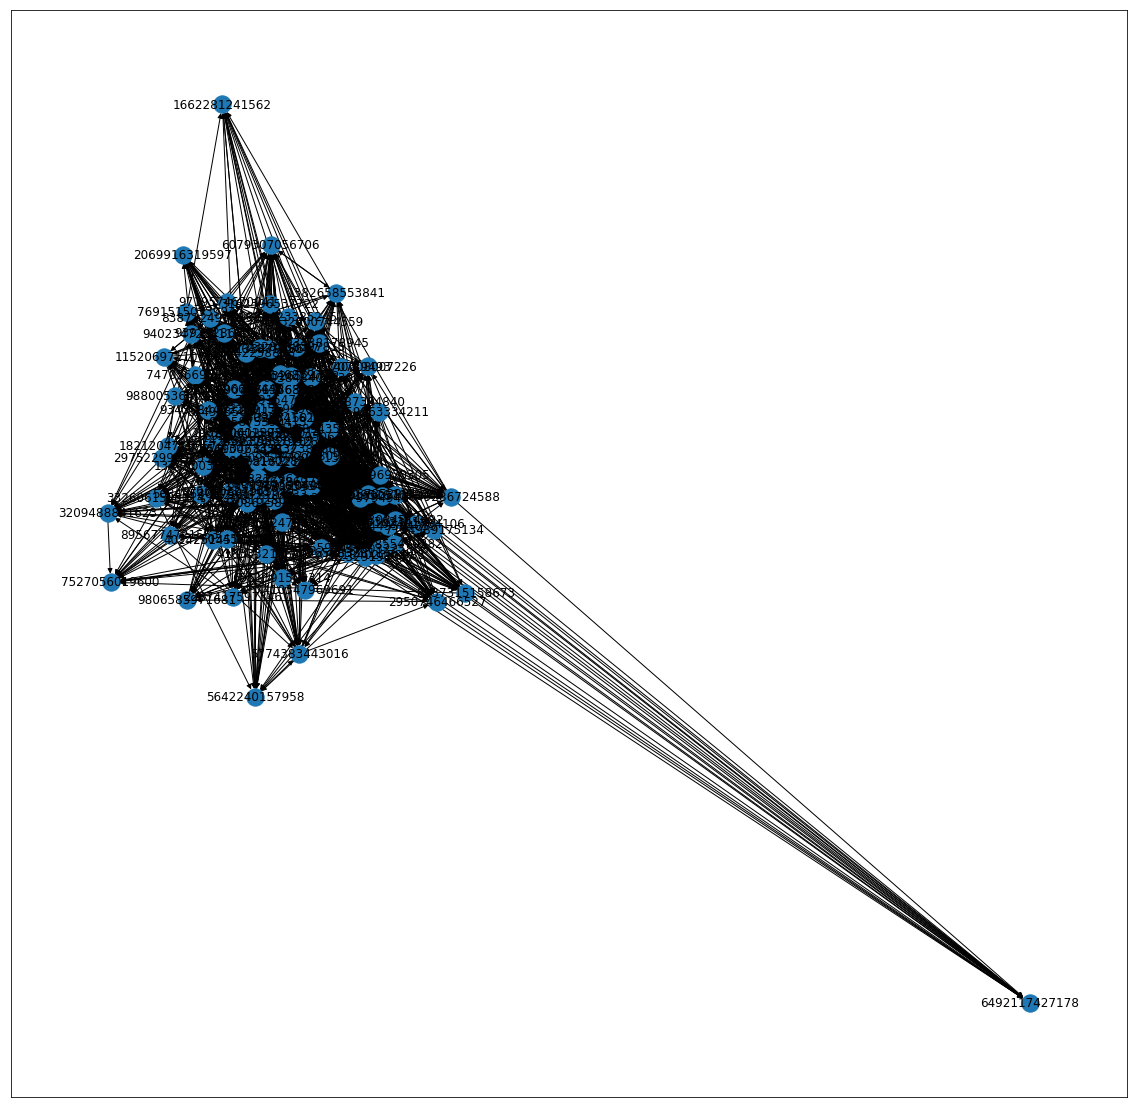

In [32]:
pos = nx.spring_layout(G_asymmetric)
betCent = nx.betweenness_centrality(G_asymmetric, normalized=False, endpoints=False)
node_color = [20000.0 * G_asymmetric.degree(v) for v in G_asymmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_asymmetric,pos=pos)

In [25]:
#Shortest Path Network Analizi
nx.shortest_path(G_symmetric, created_customers[0].msisdn, created_customers[50].msisdn)

['6311224161920', '4971336305477', '8068678697433']

In [ ]:
6492117427178 

In [37]:
#For HTML D3js Graph
for c in network_dict:
    print(c.split("->")[0]+","+c.split("->")[1]+","+str(network_dict[c]))

6311224161920,3220887304840,1
6311224161920,2295187638056,1
6311224161920,9828423385245,1
6311224161920,7728863810233,1
6311224161920,3907667852291,1
6311224161920,5642240157958,1
6311224161920,2691374620707,1
6311224161920,7248755934478,1
6311224161920,5556096692445,1
6311224161920,1821204719757,1
6311224161920,5649286724588,1
6311224161920,3539897992654,1
6311224161920,9402347254113,1
6311224161920,2318402358983,1
6311224161920,7691515033994,1
6311224161920,9806585971681,1
6311224161920,6009714590449,1
6311224161920,7527056019600,1
6311224161920,7410347969691,1
6311224161920,8458373826685,1
6311224161920,2287417597346,1
6311224161920,5522710506731,1
6311224161920,5939970789493,1
6311224161920,6365383281116,1
6311224161920,2223091569990,1
6311224161920,8349035644132,1
6311224161920,6981628009459,1
6311224161920,6907866556890,1
5177855470282,2069916319597,1
5177855470282,9402347254113,1
5177855470282,8140608007226,1
5177855470282,8387224963350,1
5177855470282,6311224161920,1
5177855470

In [13]:
G_weighted = nx.Graph()
for c in network_dict:
    G_weighted.add_edge(c.split("->")[0],c.split("->")[1], weight=network_dict[c])
    
print(nx.info(G_weighted))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1659
Average degree:  33.1800


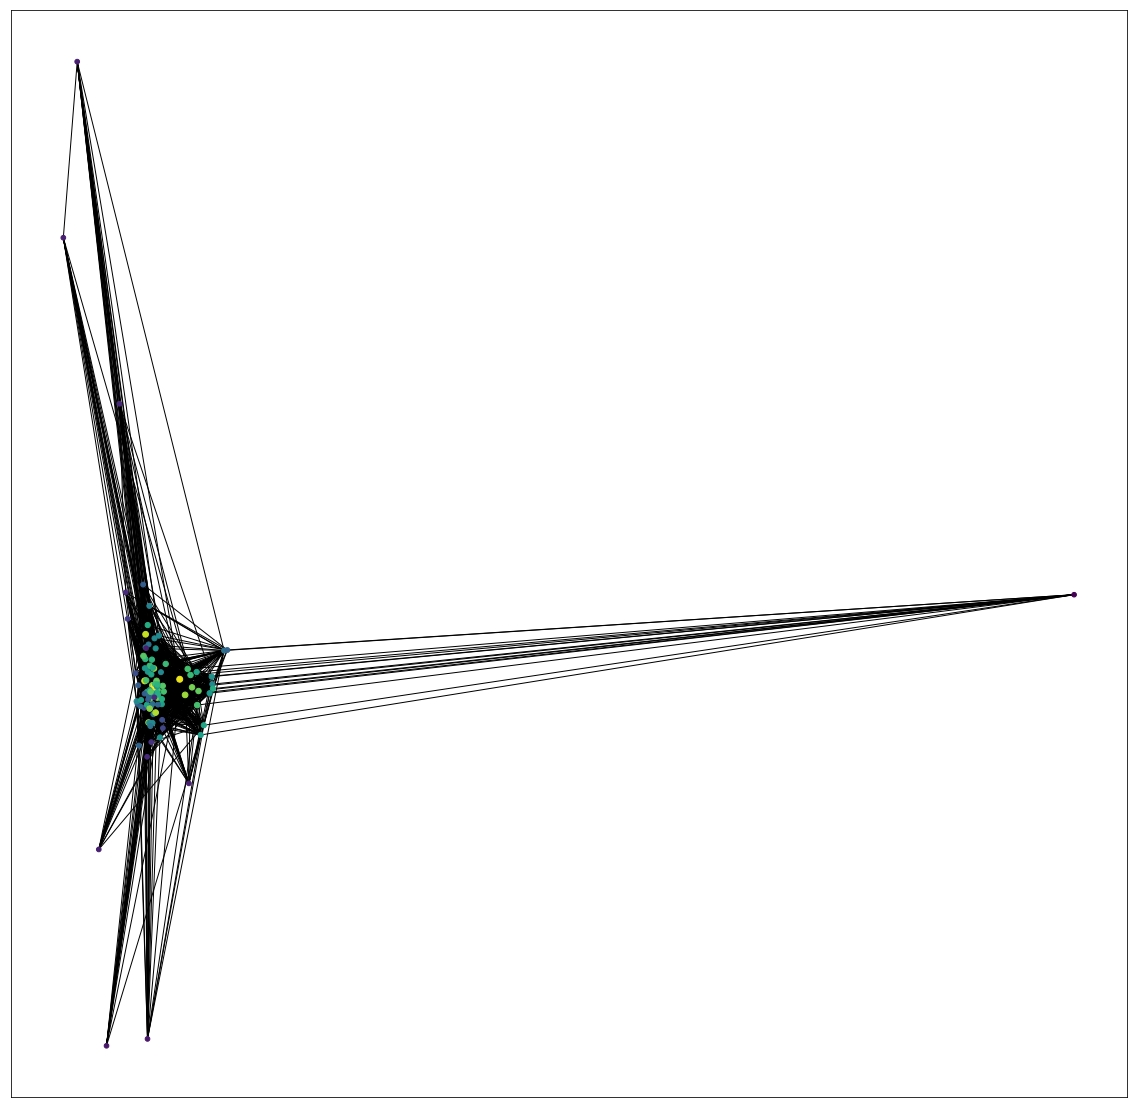

In [14]:
pos = nx.spectral_layout(G_weighted)
betCent = nx.betweenness_centrality(G_weighted, normalized=True, endpoints=True)
node_color = [20000.0 * G_weighted.degree(v) for v in G_weighted]
node_size =  [v * 1000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_weighted, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )

In [23]:
G_symmetric = nx.Graph()
for c in network_dict:
    G_symmetric.add_edge(c.split("->")[0],c.split("->")[1])
    
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1659
Average degree:  33.1800


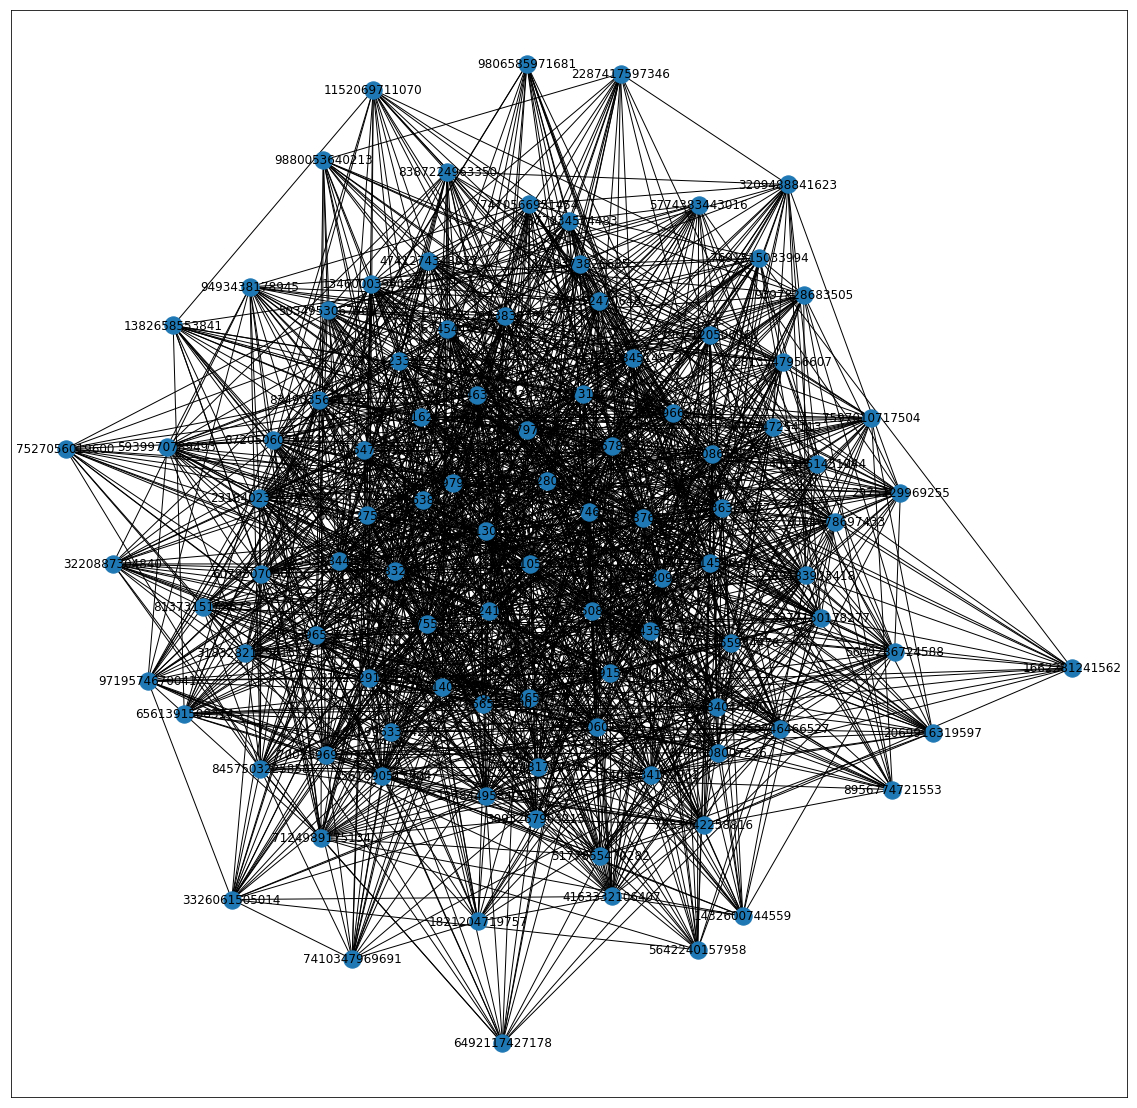

In [24]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_symmetric,pos=pos)